In [1]:
# Import the required packages
import os
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
import pathlib
import librosa.display
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd

import matplotlib.pyplot as plt
from keras.utils import np_utils

import tensorflow as tf
from tensorflow.keras.preprocessing.image import *
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Activation, MaxPool2D, Dropout
# Deep Learning Libraries
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from keras.utils import to_categorical

In [2]:
# a package to compute speech features, implemented using tf.keras
try:
    from spela.spectrogram import Spectrogram 
    from spela.melspectrogram import Melspectrogram
except:
    !pip install spela
    from spela.spectrogram import Spectrogram 
    from spela.melspectrogram import Melspectrogram

In [3]:
classes = ['Nelson_Mandela', 'Magaret_Tarcher','Benjamin_Netanyau','Jens_Stoltenberg', 'Julia_Gillard'] 

In [10]:
# inspect the folders inside the dataset
# Get the data directories
data_dir = "/content/drive/MyDrive/16000_pcm_speeches"
os.listdir(data_dir)

['Benjamin_Netanyau',
 'Jens_Stoltenberg',
 'Julia_Gillard',
 'Magaret_Tarcher',
 'Nelson_Mandela',
 '_background_noise_',
 'other',
 'tf_Wav_reader.py',
 'train_x.npy',
 'train_y.npy',
 'test_x.npy',
 'test_y.npy',
 'variables',
 'assets',
 'shaved_model.pb',
 '.ipynb_checkpoints',
 'shaved_model2.pb',
 'shaved_model3.pb',
 'history1.npy',
 'history2.npy',
 'history1_2.npy',
 'history3.npy',
 'history1_3.npy',
 'o5model',
 'saved_model.pb',
 'allmodel']

In [5]:
train_x = np.load('/content/drive/MyDrive/16000_pcm_speeches/train_x.npy')
train_y = np.load('/content/drive/MyDrive/16000_pcm_speeches/train_y.npy')
test_x = np.load('/content/drive/MyDrive/16000_pcm_speeches/test_x.npy')
test_y = np.load('/content/drive/MyDrive/16000_pcm_speeches/test_y.npy')

# Train with 5 first labels Fashion Mnist trained model


In [ ]:
model_trained = tf.keras.models.load_model("/content/drive/MyDrive/SimpleDNN/u5FAS/shavedmodel.pb")
for layer in model_trained.layers[:5]:
   layer.trainable =False

In [ ]:
model_trained.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 62725     
_________________________________________________________________
activation_3 (Activation)    (None, 5)                 0   

In [6]:
import os
import shutil
import  joblib
import numpy as np
import pandas as pd
import librosa as lb
import librosa.display
import matplotlib.pyplot as plt

from pathlib import Path
from tqdm.notebook import tqdm

In [ ]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras.optimizers import Adam ,RMSprop
import os 

Learning_rate = 0.001

optimizer = Adam(lr=Learning_rate)
 
model_trained.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=1e-100)

batch_size = 64
checkpoint_path = "/content/drive/MyDrive/SimpleDNN/melu5"
checkpoint_dir = os.path.dirname(checkpoint_path)
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,monitor='val_accuracy',mode='max',
                                                               save_best_only=True)

In [9]:
class params:
    """
    Parameters used for the audio data
    """
    sr = 16000

    # Melspectrogram
    n_mels = 28
    fmin = 15
    fmax = sr // 2  # Shannon theorem

In [7]:
def compute_melspec(y, params):
    """
    Computes a mel-spectrogram and puts it at decibel scale
    Arguments:
        y {np array} -- signal
        params {AudioParams} -- Parameters to use for the spectrogram. Expected to have the attributes sr, n_mels, f_min, f_max
    Returns:
    """
    melspec = lb.feature.melspectrogram( 
        y, sr=params.sr, hop_length=590, n_mels=params.n_mels, fmin=params.fmin, fmax=params.fmax,n_fft=2000,
    )

    melspec = lb.power_to_db(melspec).astype(np.float32)
    return melspec

In [11]:
mel_train_x = []
for i in range(len(train_x)):
  mel_train_x.append(compute_melspec(train_x[i].reshape(16000), params))
mel_test_x = []
for i in range(len(test_x)):
  mel_test_x.append(compute_melspec(test_x[i].reshape(16000), params))
  

In [12]:
mel_train_x = np.array(mel_train_x)
mel_train_x.shape
mel_test_x = np.array(mel_test_x)
mel_test_x.shape

(1500, 28, 28)

In [13]:
Y = np.array([np.where(r==1)[0][0] for r in train_y])

In [ ]:
history = model_trained.fit(x=mel_train_x, y= Y, epochs = 100, validation_split = 0.10, shuffle = True,
                     batch_size = batch_size, verbose = 1, steps_per_epoch= train_x.shape[0] // batch_size,callbacks=[checkpoint,learning_rate_reduction])
model_trained.save("/content/drive/MyDrive/SimpleDNN/melu5/savemodel") # saving the model

np.save('/content/drive/MyDrive/SimpleDNN/melu5/history1.npy',history.history)

Epoch 1/100
93/93 [==============================] - 1s 5ms/step - loss: 276.5475 - accuracy: 0.3585 - val_loss: 85.3721 - val_accuracy: 0.6117
INFO:tensorflow:Assets written to: /content/drive/MyDrive/SimpleDNN/melu5/assets
Epoch 2/100
93/93 [==============================] - 0s 3ms/step - loss: 59.9848 - accuracy: 0.6783 - val_loss: 30.4379 - val_accuracy: 0.7717
INFO:tensorflow:Assets written to: /content/drive/MyDrive/SimpleDNN/melu5/assets
Epoch 3/100
93/93 [==============================] - 0s 3ms/step - loss: 24.9613 - accuracy: 0.8046 - val_loss: 13.3704 - val_accuracy: 0.8417
INFO:tensorflow:Assets written to: /content/drive/MyDrive/SimpleDNN/melu5/assets
Epoch 4/100
93/93 [==============================] - 0s 3ms/step - loss: 9.9906 - accuracy: 0.8818 - val_loss: 8.4553 - val_accuracy: 0.8867
INFO:tensorflow:Assets written to: /content/drive/MyDrive/SimpleDNN/melu5/assets
Epoch 5/100
93/93 [==============================] - 0s 3ms/step - loss: 7.3344 - accuracy: 0.9099 - val_

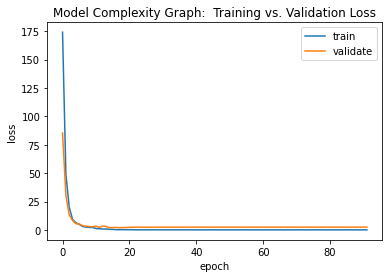

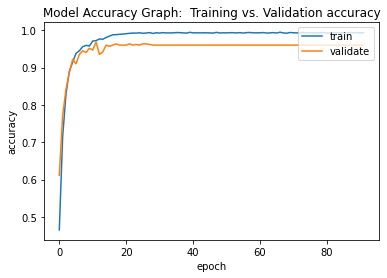

In [ ]:
history1 = np.load('/content/drive/MyDrive/SimpleDNN/melu5/history1.npy', allow_pickle= True).item()
plt.figure(1)
plt.plot(history1['loss'])
plt.plot(history1['val_loss'])
plt.title('Model Complexity Graph:  Training vs. Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper right')
plt.show()
plt.figure(2)
plt.plot(history1['accuracy'])
plt.plot(history1['val_accuracy'])
plt.title('Model Accuracy Graph:  Training vs. Validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper right')
plt.show()

In [ ]:
Ytest = np.array([np.where(r==1)[0][0] for r in test_y])
model = tf.keras.models.load_model("/content/drive/MyDrive/16000_pcm_speeches")
score = model.evaluate(mel_test_x, Ytest, verbose = 1) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

47/47 [==============================] - 0s 3ms/step - loss: 0.2552 - accuracy: 0.9193
Test loss: 0.2552049160003662
Test accuracy: 0.9193333387374878


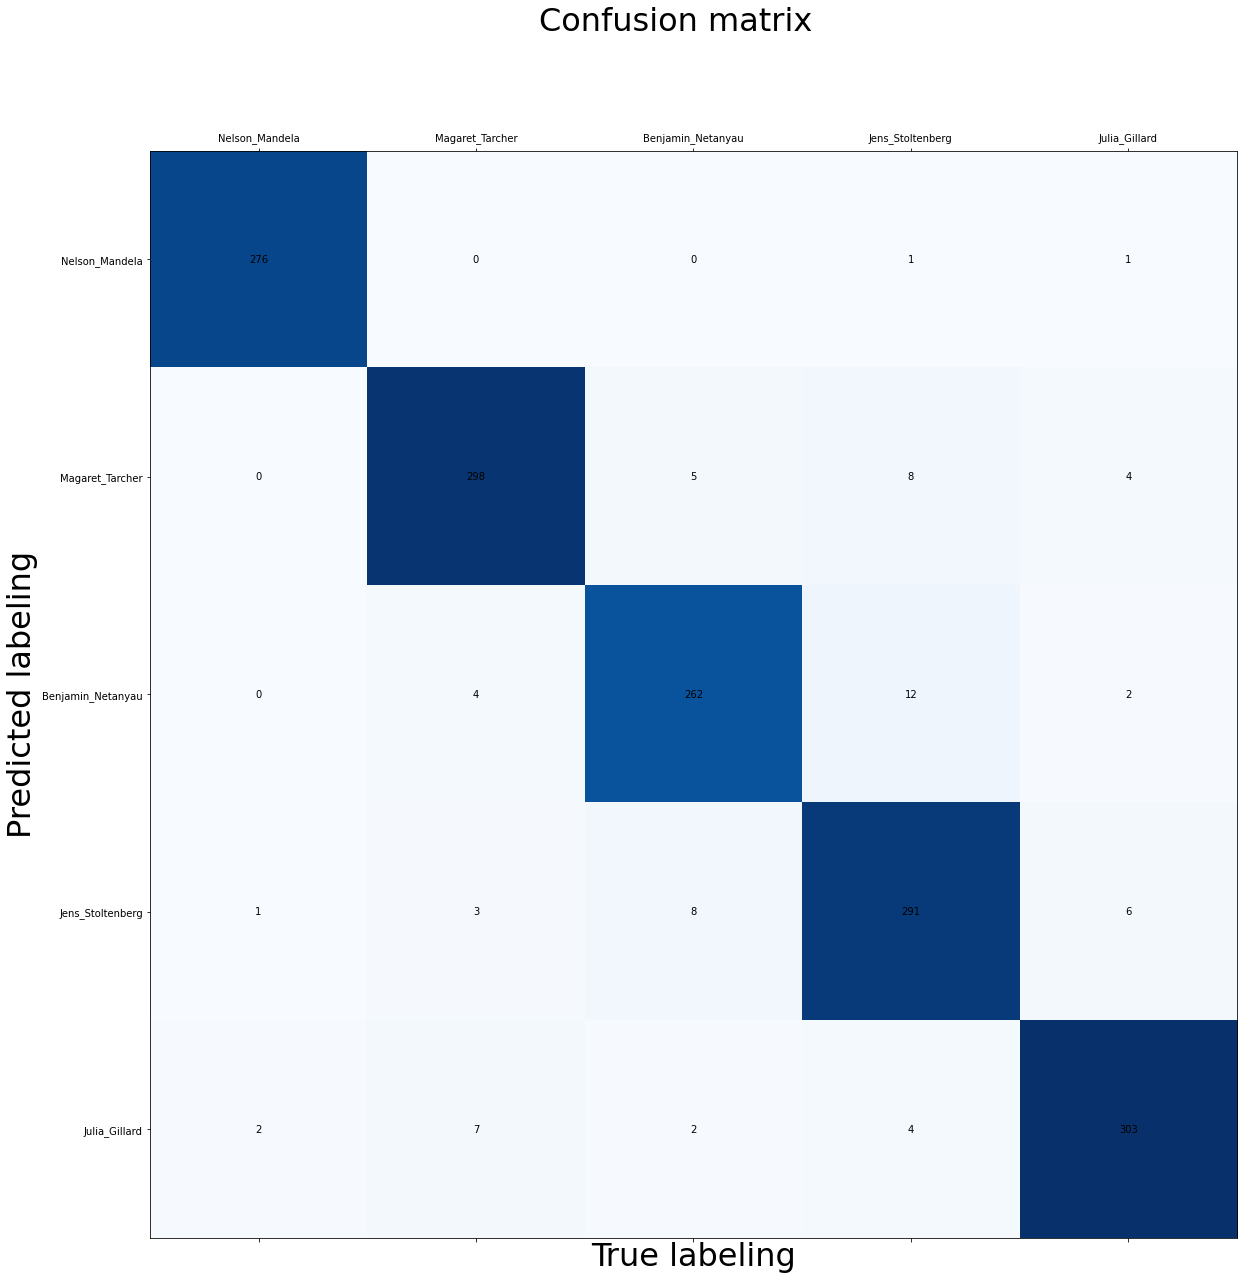

In [ ]:
from sklearn.metrics import confusion_matrix

y_vecs = model_trained.predict(mel_test_x)
y_pred = np.argmax(y_vecs, axis=1)
y_true = Ytest
cm = confusion_matrix(y_true, y_pred)
# print(cm)

# plt.imshow(cm, cmap = 'ocean')
# plt.colorbar

min_val, max_val = 0, 15

# intersection_matrix = np.random.randint(0, 10, size=(max_val, max_val))
fig, ax = plt.subplots(figsize=(20,20))
ax.matshow(cm, cmap=plt.cm.Blues)
# ax.matshow(cm, cmap=plt.cm.magma_r)
ax.xaxis.set_ticklabels(classes); ax.yaxis.set_ticklabels(classes);

for i in range(5):
    for j in range(5):
        c = cm[j,i]
        ax.text(i, j, str(c), va='center', ha='center')


plt.xticks(range(5))
plt.yticks(range(5))
plt.suptitle('Confusion matrix',size = 32)
plt.xlabel('True labeling',size = 32)
plt.ylabel('Predicted labeling',size = 32)
plt.rcParams.update({'font.size': 28})

Train with the second 5 Fashion Mnist trained model

In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/SimpleDNN/o5FAS/savemodel/")
for layer in model_trained.layers[:5]:
   layer.trainable =False

In [ ]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras.optimizers import Adam ,RMSprop, Adagrad
import os 

Learning_rate = 0.01

optimizer = Adagrad(lr=Learning_rate)
 
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.3, 
                                            min_lr=1e-100)

batch_size = 64
checkpoint_path = "/content/drive/MyDrive/SimpleDNN/melo5/"
checkpoint_dir = os.path.dirname(checkpoint_path)
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,monitor='val_accuracy',mode='max',
                                                               save_best_only=True)

In [ ]:
history = model.fit(x=mel_train_x, y= Y, epochs = 100, validation_split = 0.10, shuffle = True,
                     batch_size = batch_size, verbose = 1, steps_per_epoch= train_x.shape[0] // batch_size,callbacks=[checkpoint,learning_rate_reduction])
model_trained.save("/content/drive/MyDrive/SimpleDNN/melo5/savemodel") # saving the model

np.save('/content/drive/MyDrive/SimpleDNN/melo5/savemodel/history1',history.history)


Epoch 1/100
93/93 [==============================] - 2s 11ms/step - loss: 1.0181 - accuracy: 0.7049 - val_loss: 3.1855 - val_accuracy: 0.1983
INFO:tensorflow:Assets written to: /content/drive/MyDrive/SimpleDNN/melo5/assets
Epoch 2/100
93/93 [==============================] - 1s 7ms/step - loss: 0.3303 - accuracy: 0.8841 - val_loss: 3.2366 - val_accuracy: 0.1983
Epoch 3/100
93/93 [==============================] - 1s 7ms/step - loss: 0.2677 - accuracy: 0.9060 - val_loss: 2.6345 - val_accuracy: 0.1983

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0029999999329447745.
Epoch 4/100
93/93 [==============================] - 1s 7ms/step - loss: 0.2280 - accuracy: 0.9177 - val_loss: 2.1897 - val_accuracy: 0.1983
Epoch 5/100
93/93 [==============================] - 1s 7ms/step - loss: 0.2118 - accuracy: 0.9290 - val_loss: 1.9442 - val_accuracy: 0.1983

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0009000000078231095.
Epoch 6/100
93/93 [==============================] 

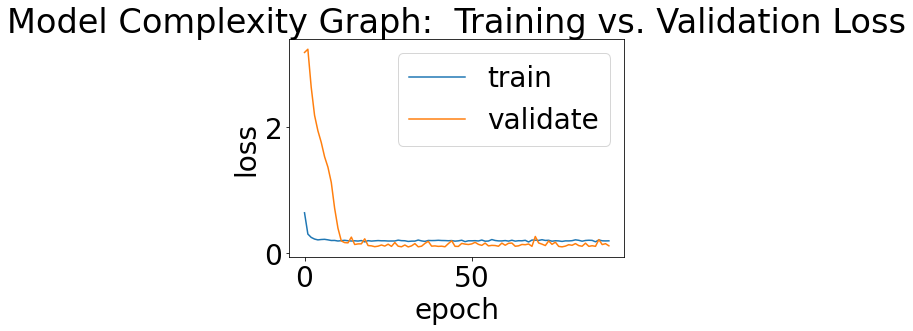

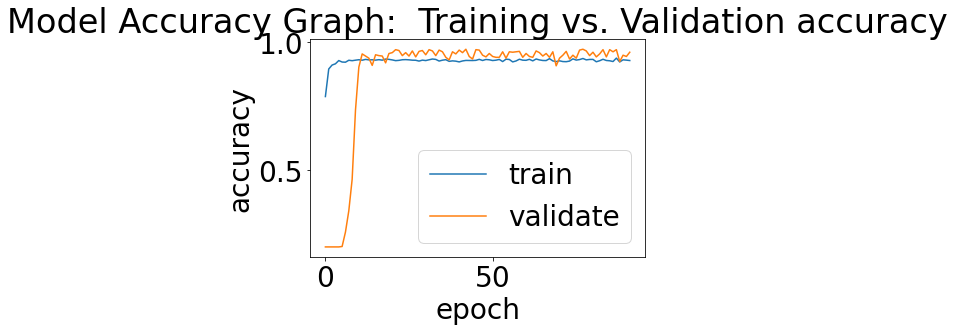

In [ ]:
history1 = np.load("/content/drive/MyDrive/SimpleDNN/melo5/savemodel/history1.npy", allow_pickle= True).item()
plt.figure(1)
plt.plot(history1['loss'])
plt.plot(history1['val_loss'])
plt.title('Model Complexity Graph:  Training vs. Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper right')
plt.show()
plt.figure(2)
plt.plot(history1['accuracy'])
plt.plot(history1['val_accuracy'])
plt.title('Model Accuracy Graph:  Training vs. Validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='lower right')
plt.show()

In [ ]:
score = model.evaluate(mel_test_x, Ytest, verbose = 1) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

47/47 [==============================] - 0s 3ms/step - loss: 0.1327 - accuracy: 0.9547
Test loss: 0.13269734382629395
Test accuracy: 0.9546666741371155


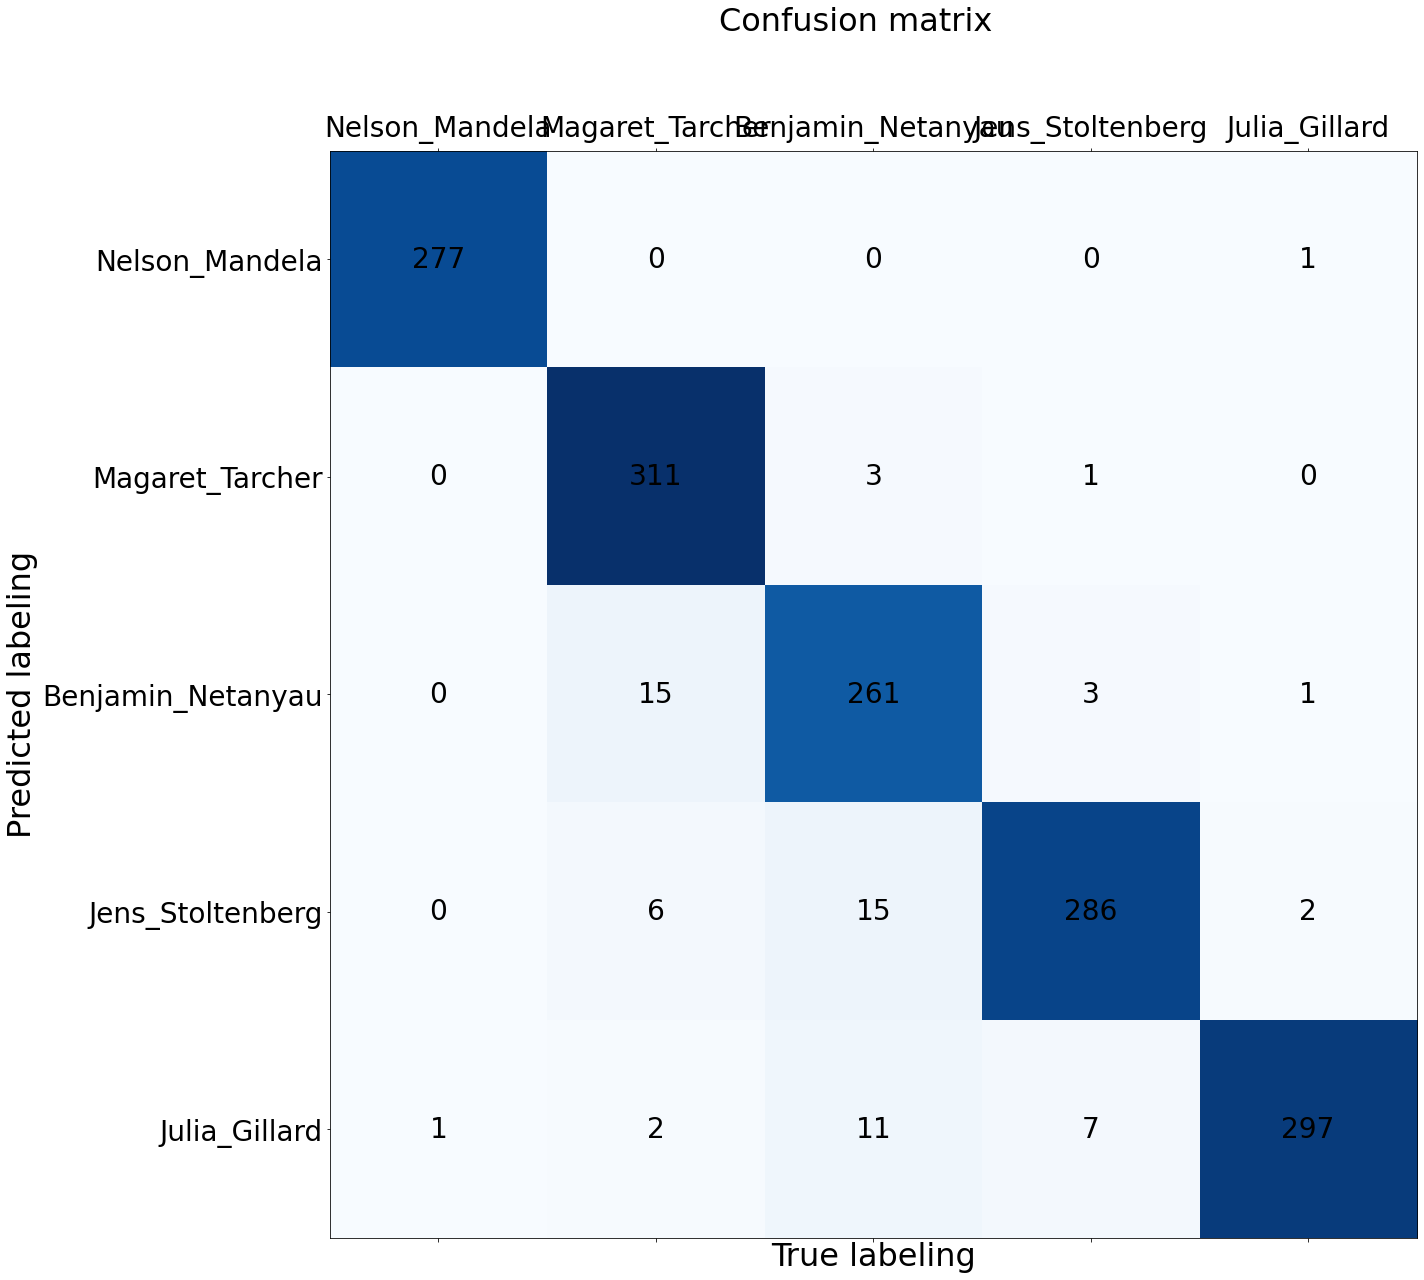

In [ ]:
from sklearn.metrics import confusion_matrix

y_vecs = model.predict(mel_test_x)
y_pred = np.argmax(y_vecs, axis=1)
y_true = Ytest
cm = confusion_matrix(y_true, y_pred)
# print(cm)

# plt.imshow(cm, cmap = 'ocean')
# plt.colorbar

min_val, max_val = 0, 15

# intersection_matrix = np.random.randint(0, 10, size=(max_val, max_val))
fig, ax = plt.subplots(figsize=(20,20))
ax.matshow(cm, cmap=plt.cm.Blues)
# ax.matshow(cm, cmap=plt.cm.magma_r)
ax.xaxis.set_ticklabels(classes); ax.yaxis.set_ticklabels(classes);

for i in range(5):
    for j in range(5):
        c = cm[j,i]
        ax.text(i, j, str(c), va='center', ha='center')


plt.xticks(range(5))
plt.yticks(range(5))
plt.suptitle('Confusion matrix',size = 32)
plt.xlabel('True labeling',size = 32)
plt.ylabel('Predicted labeling',size = 32)
plt.rcParams.update({'font.size': 28})

Train with whole Fashion Mnist trained model

In [19]:
from tensorflow.python.keras.layers import Input , Dense , Conv2D , Activation , Add,ReLU,MaxPool2D,Flatten,Dropout,BatchNormalization
from tensorflow.python.keras.models import Model

In [60]:
modelall2 = tf.keras.models.load_model("/content/drive/MyDrive/SimpleDNN/all1FAS")
for layer in modelall2.layers[:5]:
   layer.trainable =False

modelall2._layers.pop()
modelall2._layers.pop()
modelall2.summary()

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
Total params: 640
Trainable params: 0
Non-trainable params: 640
_________________________________________________________________


In [61]:
x=modelall2.output
x = Dense(5)(x)
x = Activation("softmax")(x)
inp = modelall2.input
modelall2 =  Model(inputs = inp, outputs =x)
modelall2.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                125450    
_________________________________________________________________
activation_9 (Activation)    (None, 10)                0   

In [62]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras.optimizers import Adam ,RMSprop, Adagrad
import os 

Learning_rate = 10

optimizer = Adam(lr=Learning_rate)
 
modelall2.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=1e-100)

batch_size = 60
checkpoint_path = "/content/drive/MyDrive/SimpleDNN/melall/"
checkpoint_dir = os.path.dirname(checkpoint_path)
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,monitor='val_accuracy',mode='max',
                                                               save_best_only=True)

In [59]:
del modelall2

In [63]:
history = modelall2.fit(x=mel_train_x, y= Y, epochs = 100, validation_split = 0.10, shuffle = True,
                     batch_size = batch_size, verbose = 1, steps_per_epoch= mel_train_x.shape[0] // batch_size,callbacks=[checkpoint,learning_rate_reduction])
modelall2.save("/content/drive/MyDrive/SimpleDNN/melall/savedmodel") # saving the model

np.save('/content/drive/MyDrive/SimpleDNN/melall/history2.npy',history.history)

Epoch 1/100
99/99 [==============================] - 1s 4ms/step - loss: 7.6847 - accuracy: 0.1969 - val_loss: 1.7891 - val_accuracy: 0.2100
INFO:tensorflow:Assets written to: /content/drive/MyDrive/SimpleDNN/melall/assets
Epoch 2/100
99/99 [==============================] - 0s 2ms/step - loss: 2.2265 - accuracy: 0.1980 - val_loss: 2.4818 - val_accuracy: 0.2017
Epoch 3/100
99/99 [==============================] - 0s 3ms/step - loss: 2.7418 - accuracy: 0.2026 - val_loss: 2.3562 - val_accuracy: 0.2017
Epoch 4/100
99/99 [==============================] - 0s 3ms/step - loss: 2.4960 - accuracy: 0.1956 - val_loss: 2.2641 - val_accuracy: 0.1983

Epoch 00004: ReduceLROnPlateau reducing learning rate to 5.0.
Epoch 5/100
99/99 [==============================] - 0s 3ms/step - loss: 1.8961 - accuracy: 0.2138 - val_loss: 1.8000 - val_accuracy: 0.2017
Epoch 6/100
99/99 [==============================] - 0s 3ms/step - loss: 1.8115 - accuracy: 0.2065 - val_loss: 1.7215 - val_accuracy: 0.2017
Epoch 7/1

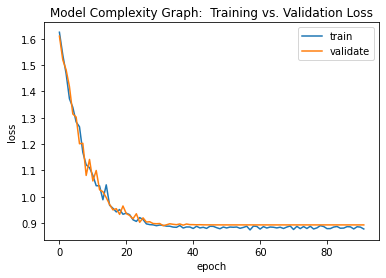

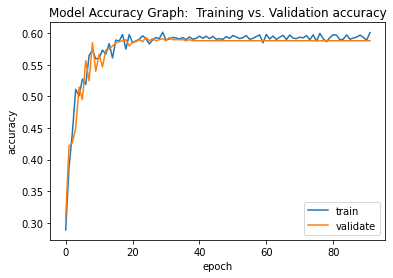

In [ ]:
history1 = np.load("/content/drive/MyDrive/SimpleDNN/melall/history1.npy", allow_pickle= True).item()
plt.figure(1)
plt.plot(history1['loss'])
plt.plot(history1['val_loss'])
plt.title('Model Complexity Graph:  Training vs. Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper right')
plt.show()
plt.figure(2)
plt.plot(history1['accuracy'])
plt.plot(history1['val_accuracy'])
plt.title('Model Accuracy Graph:  Training vs. Validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='lower right')
plt.show()

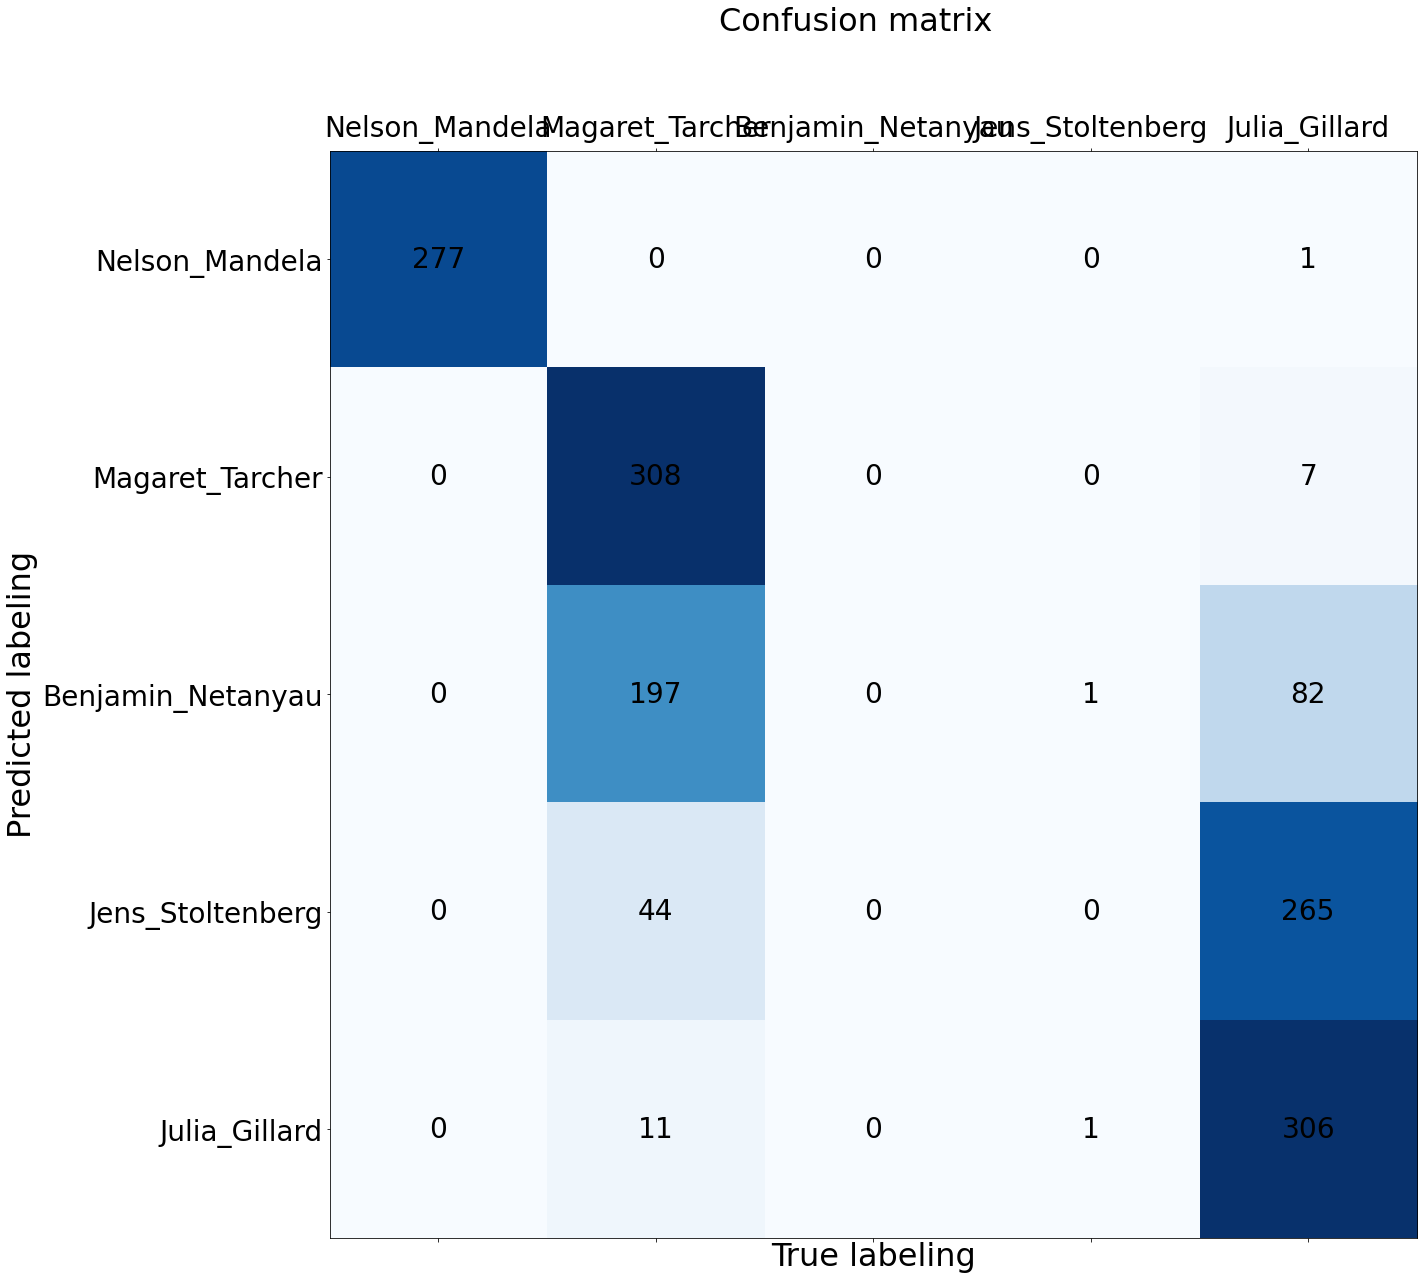

In [18]:
from sklearn.metrics import confusion_matrix
Ytest = np.array([np.where(r==1)[0][0] for r in test_y])
modelall = tf.keras.models.load_model("/content/drive/MyDrive/SimpleDNN/melall")
y_vecs = modelall.predict(mel_test_x)
y_pred = np.argmax(y_vecs, axis=1)
y_true = Ytest
cm = confusion_matrix(y_true, y_pred)
# print(cm)

# plt.imshow(cm, cmap = 'ocean')
# plt.colorbar

min_val, max_val = 0, 15

# intersection_matrix = np.random.randint(0, 10, size=(max_val, max_val))
fig, ax = plt.subplots(figsize=(20,20))
ax.matshow(cm, cmap=plt.cm.Blues)
# ax.matshow(cm, cmap=plt.cm.magma_r)
ax.xaxis.set_ticklabels(classes); ax.yaxis.set_ticklabels(classes);

for i in range(5):
    for j in range(5):
        c = cm[j,i]
        ax.text(i, j, str(c), va='center', ha='center')


plt.xticks(range(5))
plt.yticks(range(5))
plt.suptitle('Confusion matrix',size = 32)
plt.xlabel('True labeling',size = 32)
plt.ylabel('Predicted labeling',size = 32)
plt.rcParams.update({'font.size': 28})

Train with a non trained model

In [ ]:
from tensorflow.python.keras.layers import Input , Dense , Conv2D , Activation , Add,ReLU,MaxPool2D,Flatten,Dropout,BatchNormalization
from tensorflow.python.keras.models import Model
input = Input(shape=[28, 28, 1])
x= Conv2D(64, (3, 3), strides=1, padding='same')(input)
x = Activation('relu')(x)
x = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(x)
x = Flatten()(x)
x = Dense(5)(x)
x = Activation('softmax')(x)
modelnon = Model(inputs = input, outputs =x)


In [ ]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras.optimizers import Adam ,RMSprop, Adagrad
import os 

Learning_rate = 0.01

optimizer = Adam(lr=Learning_rate)
 
modelnon.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=1e-100)

batch_size = 64
checkpoint_path = "/content/drive/MyDrive/SimpleDNN/melnon"
checkpoint_dir = os.path.dirname(checkpoint_path)
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,monitor='val_accuracy',mode='max',
                                                               save_best_only=True)

In [ ]:
history1 = modelnon.fit(x=mel_train_x, y= Y, epochs = 100, validation_split = 0.10, shuffle = True,
                     batch_size = batch_size, verbose = 1, steps_per_epoch= mel_train_x.shape[0] // batch_size,callbacks=[checkpoint,learning_rate_reduction])
model.save("/content/drive/MyDrive/SimpleDNN/melnon/savemodel") # saving the model

np.save('//content/drive/MyDrive/SimpleDNN/melnon/history1.npy',history1.history)

Epoch 1/100
93/93 [==============================] - 17s 6ms/step - loss: 21.0294 - accuracy: 0.5740 - val_loss: 0.4055 - val_accuracy: 0.9417
INFO:tensorflow:Assets written to: /content/drive/MyDrive/SimpleDNN/melnon/assets
Epoch 2/100
93/93 [==============================] - 0s 3ms/step - loss: 0.2789 - accuracy: 0.9538 - val_loss: 0.0831 - val_accuracy: 0.9850
INFO:tensorflow:Assets written to: /content/drive/MyDrive/SimpleDNN/melnon/assets
Epoch 3/100
93/93 [==============================] - 0s 3ms/step - loss: 0.1501 - accuracy: 0.9730 - val_loss: 0.5854 - val_accuracy: 0.9333
Epoch 4/100
93/93 [==============================] - 0s 3ms/step - loss: 0.6987 - accuracy: 0.9361 - val_loss: 0.4003 - val_accuracy: 0.9733
Epoch 5/100
93/93 [==============================] - 0s 3ms/step - loss: 0.2946 - accuracy: 0.9716 - val_loss: 0.2421 - val_accuracy: 0.9850

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.004999999888241291.
Epoch 6/100
93/93 [==============================

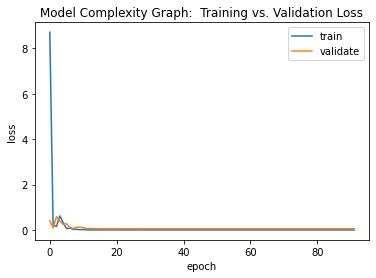

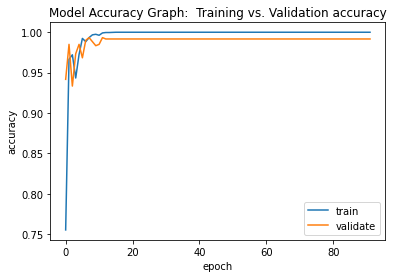

In [ ]:
history1 = np.load("/content/drive/MyDrive/SimpleDNN/melnon/history1.npy", allow_pickle= True).item()
plt.figure(1)
plt.plot(history1['loss'])
plt.plot(history1['val_loss'])
plt.title('Model Complexity Graph:  Training vs. Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper right')
plt.show()
plt.figure(2)
plt.plot(history1['accuracy'])
plt.plot(history1['val_accuracy'])
plt.title('Model Accuracy Graph:  Training vs. Validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='lower right')
plt.show()

In [ ]:
Ytest = np.array([np.where(r==1)[0][0] for r in test_y])
score = modelnon.evaluate(mel_test_x, Ytest, verbose = 1) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

47/47 [==============================] - 0s 2ms/step - loss: 0.0600 - accuracy: 0.9913
Test loss: 0.059965163469314575
Test accuracy: 0.9913333058357239


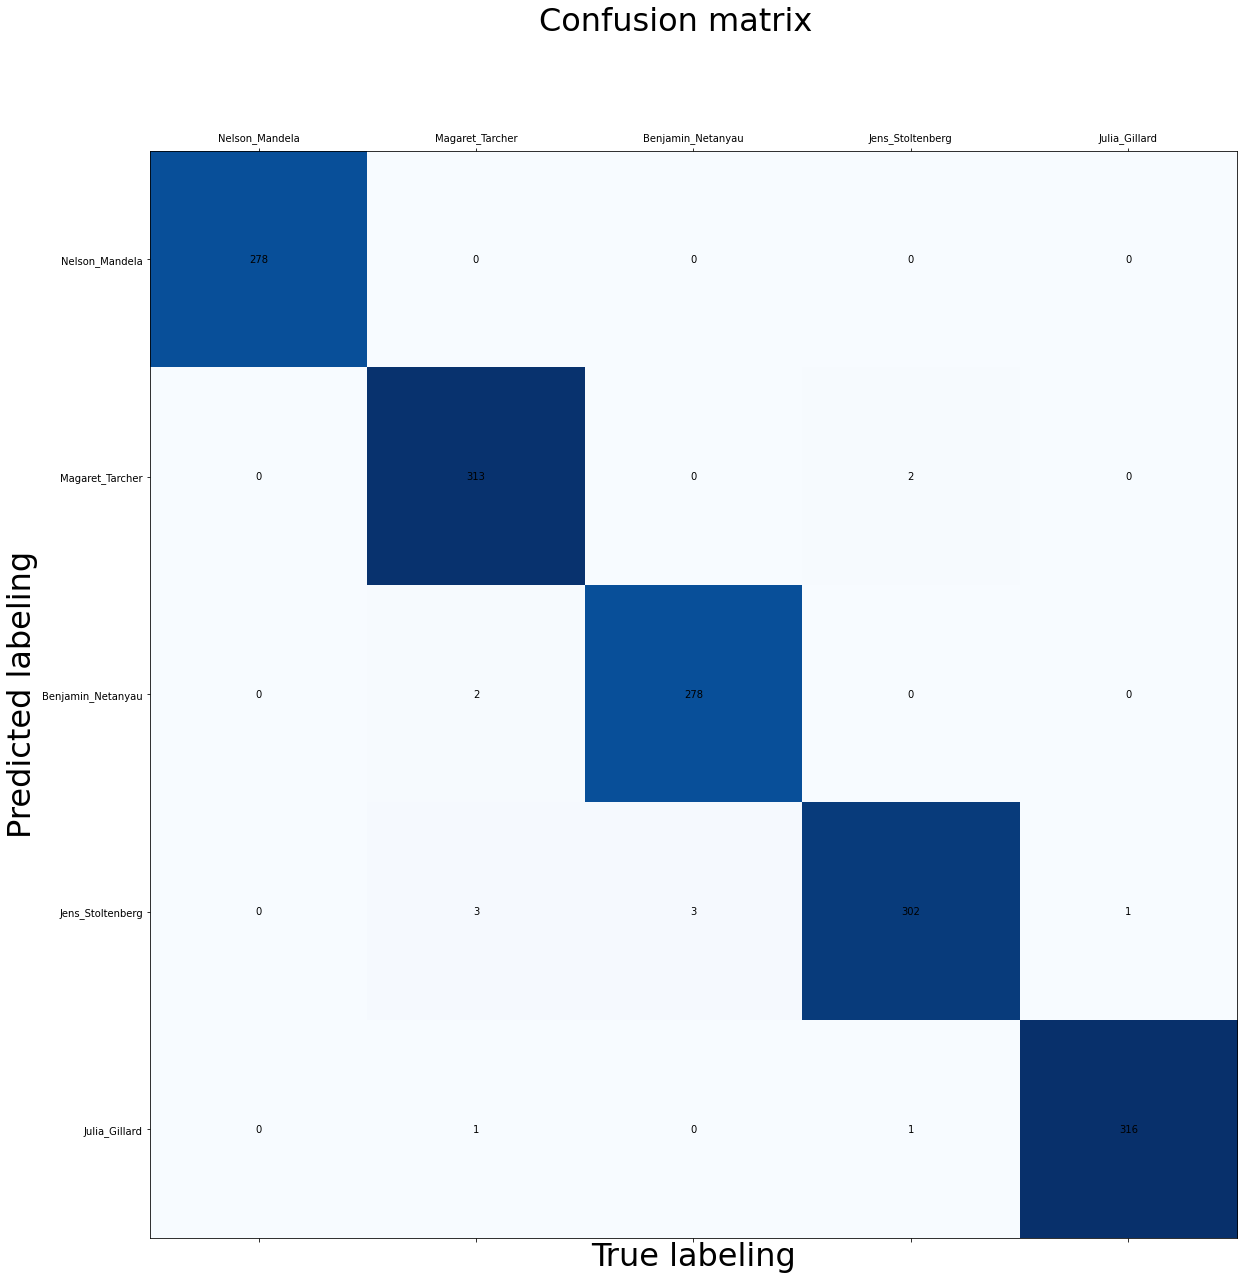

In [ ]:
from sklearn.metrics import confusion_matrix

y_vecs = modelnon.predict(mel_test_x)
y_pred = np.argmax(y_vecs, axis=1)
y_true = Ytest
cm = confusion_matrix(y_true, y_pred)
# print(cm)

# plt.imshow(cm, cmap = 'ocean')
# plt.colorbar

min_val, max_val = 0, 15

# intersection_matrix = np.random.randint(0, 10, size=(max_val, max_val))
fig, ax = plt.subplots(figsize=(20,20))
ax.matshow(cm, cmap=plt.cm.Blues)
# ax.matshow(cm, cmap=plt.cm.magma_r)
ax.xaxis.set_ticklabels(classes); ax.yaxis.set_ticklabels(classes);

for i in range(5):
    for j in range(5):
        c = cm[j,i]
        ax.text(i, j, str(c), va='center', ha='center')


plt.xticks(range(5))
plt.yticks(range(5))
plt.suptitle('Confusion matrix',size = 32)
plt.xlabel('True labeling',size = 32)
plt.ylabel('Predicted labeling',size = 32)
plt.rcParams.update({'font.size': 28})